In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_tril_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_df = clinical_tril_df.merge(mouse_drug_df,how='inner',on='Mouse ID')

# Display the data table for preview
data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [44]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_df = pd.DataFrame(sem).reset_index().rename(columns={'Tumor Volume (mm3)': 'SEM'})

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df = mean_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


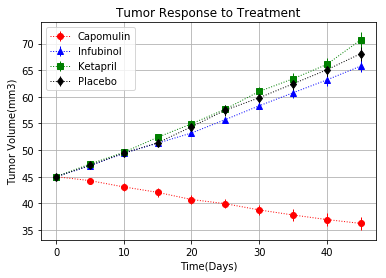

In [97]:
# Generate the Plot (with Error Bars)

errors = sem_df.pivot(index='Timepoint',columns='Drug',values='SEM').loc[:,['Capomulin','Infubinol','Ketapril','Placebo']]

mean_tumor_volume_df.loc[:,'Capomulin'].plot(kind='line',marker='o',color='r',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Capomulin'])
mean_tumor_volume_df.loc[:,'Infubinol'].plot(kind='line',marker='^',color='b',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Infubinol'])
mean_tumor_volume_df.loc[:,'Ketapril'].plot(kind='line',marker='s',color='g',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Ketapril'])
mean_tumor_volume_df.loc[:,'Placebo'].plot(kind='line',grid=True,marker='d',color='k',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Placebo'])


#mean_tumor_volume_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(kind='line',grid=True,style=['ro:','b^:','gs:','kd:'],linewidth=1.0)
#mean_tumor_volume_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(kind='line',grid=True,marker=['o','^','s','d'],linestyle=':',linewidth=1.0,yerr=errors)

plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Response to Treatment")
plt.legend()

# Save the Figure
plt.savefig('tumor_response.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [108]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_data = data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_metastatic_df = pd.DataFrame(mean_metastatic_data).reset_index()

# Preview DataFrame
mean_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [105]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
met_sem_df = pd.DataFrame(met_sem).reset_index().rename(columns={'Metastatic Sites': 'SEM'})

# Preview DataFrame
met_sem_df.head()

,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [109]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_df = mean_metastatic_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mean_metastatic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


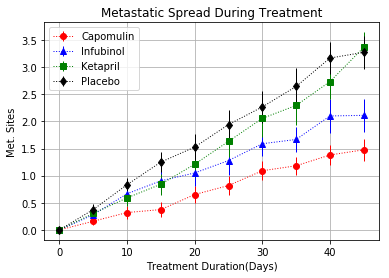

In [111]:
# Generate the Plot (with Error Bars)
errors = met_sem_df.pivot(index='Timepoint',columns='Drug',values='SEM').loc[:,['Capomulin','Infubinol','Ketapril','Placebo']]

mean_metastatic_df.loc[:,'Capomulin'].plot(kind='line',marker='o',color='r',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Capomulin'])
mean_metastatic_df.loc[:,'Infubinol'].plot(kind='line',marker='^',color='b',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Infubinol'])
mean_metastatic_df.loc[:,'Ketapril'].plot(kind='line',marker='s',color='g',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Ketapril'])
mean_metastatic_df.loc[:,'Placebo'].plot(kind='line',grid=True,marker='d',color='k',linestyle=':',linewidth=1.0,yerr=errors.loc[:,'Placebo'])


#mean_tumor_volume_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(kind='line',grid=True,style=['ro:','b^:','gs:','kd:'],linewidth=1.0)
#mean_tumor_volume_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(kind='line',grid=True,marker=['o','^','s','d'],linestyle=':',linewidth=1.0,yerr=errors)

plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend()
# Save the Figure
plt.savefig('metastatic_spread.png')
# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

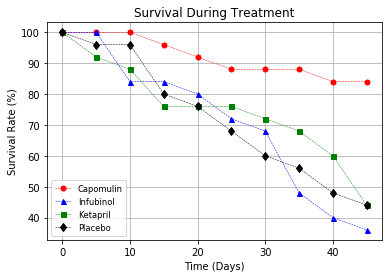

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

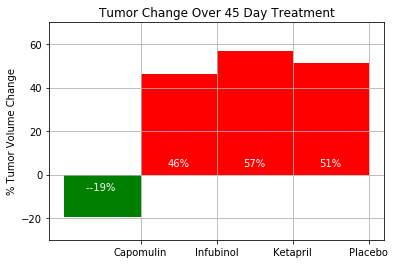